# Subplots

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

plt.subplot?

<ipython-input-2-09865e330848>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


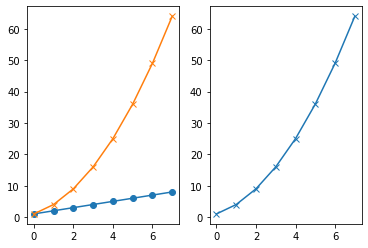

In [2]:
plt.figure()

# subplot with 1 row, 2 columns, and current axis is the 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])

plt.plot(linear_data, '-o')

exponential_data = linear_data**2

# subplot with 1 row, 2 columns and current axis is the 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-x')

# plot exponential data on the first axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

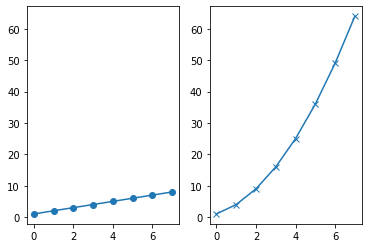

In [3]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<ipython-input-4-3f6622ec2392>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1) == plt.subplot(121)


True

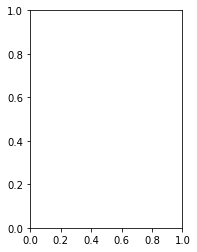

In [4]:
plt.figure()

# the right hand side is equivalent shorthand syntax
plt.subplot(1, 2, 1) == plt.subplot(121)

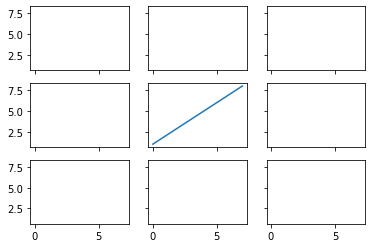

In [5]:
# create a 3x3 grid of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)

# plot the linear data on the 5th subplot axes
ax5.plot(linear_data, '-')

# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

# necessary on some systems to update the plot
plt.gcf().canvas.draw()

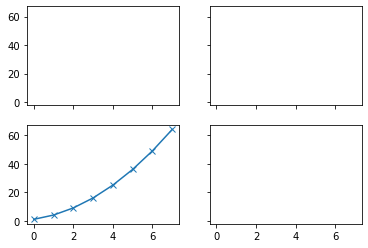

In [6]:
# create a 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

# plot the exponential data on the fifth subplot axes
ax3.plot(exponential_data, '-x')

# Histograms

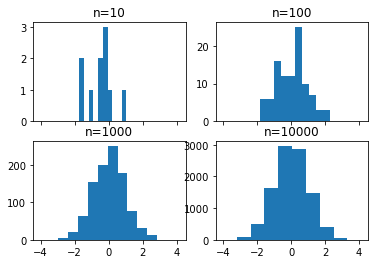

In [7]:
# create a 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

# draw n = 10, 100, 1000, 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0, len(axs)):
    sample_size = 10**(n+1)

    # remember that the random.normal creates a list of numbers based on the underlying normal distribution
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

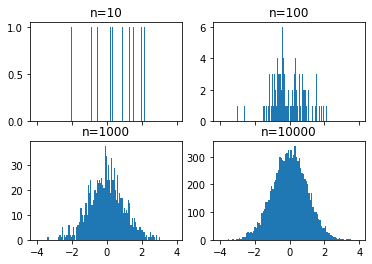

In [8]:
# repeat with the number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))


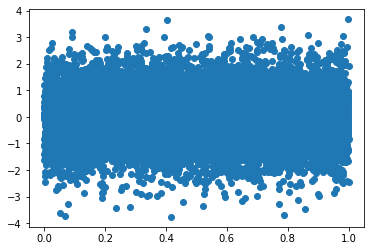

In [9]:
# Create scatter plot where the y values come from a normal distribution and the x values come from a random distribution
plt.figure()
y = np.random.normal(loc=0.0, scale=1.0, size=10000)

# random.random generates a pseudo-random number between 0 and 1
x = np.random.random(size=10000)
plt.scatter(x, y)  


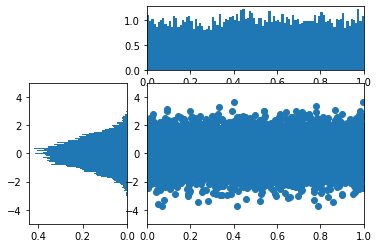

In [10]:
#use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

#         col1| col2|col3
#         ________________
# row 1   --- | --- | ---
#         ________________
# row 2   --- | --- | ---
#         ________________
# row 3   --- | --- | ---

# create the first subplot and histogram in row 0, covering off the first element, the middle position and going to the end of the row
top_hist = plt.subplot(gspec[0, 1:])

# create the side histogram starting in row 1 and continuing to the end of row elements, but limited to the 0 column
side_hist = plt.subplot(gspec[1:, 0])

# create the scatter plot starting in row 1 till the end of the row elements and extending from column 1 till the end
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(x, y)
top_hist.hist(x, bins=100)
s = side_hist.hist(y, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms. Use density=True as normed deprecated
top_hist.clear()
top_hist.hist(x, bins=100, density=True)
side_hist.clear()
side_hist.hist(y, bins=100, orientation='horizontal', density=True)

# flip the side histogram's x axis
side_hist.invert_xaxis()

# change axes limits
for ax in [top_hist, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_hist, lower_right]:
    ax.set_ylim(-5, 5)

# Box and Whisker Plots

In [11]:
import pandas as pd 

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                    'random': random_sample,
                    'gamma': gamma_sample})

In [12]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.003402,0.501973,2.009329
std,1.011408,0.287507,1.415373
min,-4.285718,0.000183,0.017331
25%,-0.679579,0.255906,0.966934
50%,-0.005708,0.498129,1.680952
75%,0.691855,0.752105,2.725869
max,3.807237,0.999921,12.811133


<ipython-input-13-156a896bc849>:4: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  _ = plt.boxplot(df['normal'], whis='range')


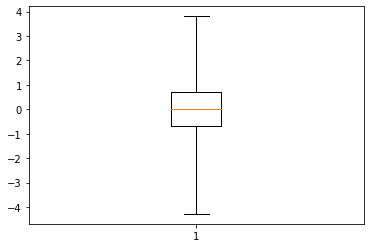

In [13]:
plt.figure()

# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

<ipython-input-14-939750d5610b>:5: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  _ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')


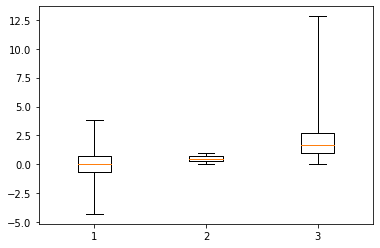

In [14]:
# clear the current figure
plt.clf()

# plot boxplots for all three columns in df
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

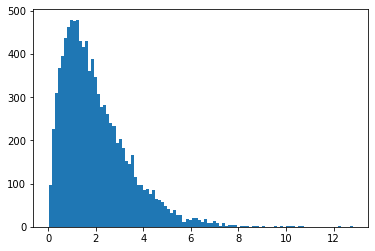

In [15]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<ipython-input-16-46395559bf27>:4: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')


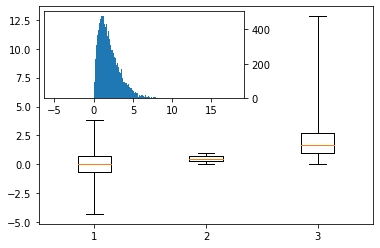

In [16]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il 

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

# overlay axis on top of another
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

# switch the y-axis tick for ax2 to the right side
ax2.yaxis.tick_right()

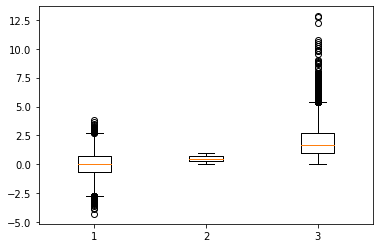

In [17]:
# if 'whis' isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ])

<ipython-input-18-bdab56796cdf>:2: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  _ = plt.boxplot([ 25, 28, 29, 29, 30, 34, 35, 35, 37, 38], whis='range')


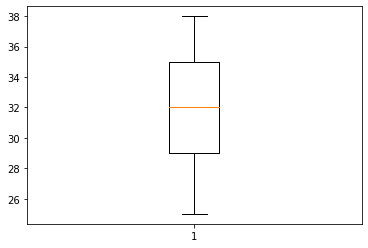

In [18]:
plt.figure()
_ = plt.boxplot([ 25, 28, 29, 29, 30, 34, 35, 35, 37, 38], whis='range')

# Heatmaps

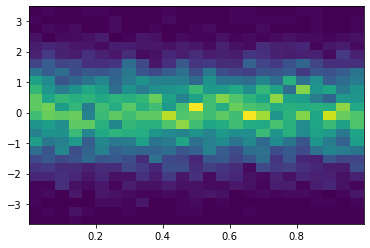

In [19]:
plt.figure()

y = np.random.normal(loc=0.0, scale=1.0, size=10000)
x = np.random.random(size=10000)
_ = plt.hist2d(x, y, bins=25)

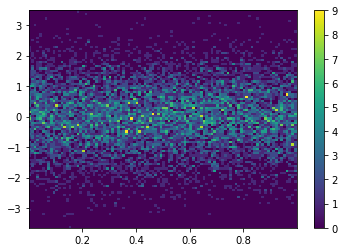

In [20]:
plt.figure()
_ = plt.hist2d(x, y, bins=100)

# add a color bar legend
plt.colorbar()

Note that the Animation and Interaction parts of the notebook will not work on VSC from my understanding. See here: https://github.com/microsoft/vscode-python/issues/3883 and https://github.com/microsoft/vscode-python/issues/3429

# Animation

In [21]:
%matplotlib notebook
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)
x

array([-1.70727231, -0.1898609 ,  0.80207451, -1.47358416, -1.24475799,
       -1.72491202, -0.94987044, -0.71899385, -0.86188833,  0.48350844,
       -0.57300397, -1.66050625, -1.15746013,  0.92543661,  1.79752213,
        0.50834422, -0.34004497,  0.74061165, -1.43422653,  2.1038824 ,
        0.4711817 , -0.08228068,  0.88627952, -2.05695771,  0.53926575,
        0.63077818,  1.97023381,  0.55525859,  0.41910314, -0.98663436,
       -0.1757021 , -0.53876497,  1.6231562 , -0.8204489 , -0.03970052,
        1.39801955,  0.87427437, -0.03322639,  0.64324434, -0.61092267,
        0.49604414, -0.66344955, -0.13798919, -1.57619956,  0.92176578,
        2.34745555,  0.7111891 ,  0.27715517,  0.84551244, -0.52805953,
        0.01676665,  0.27396635,  0.71699791, -1.35044328, -2.06035096,
        0.41769696, -0.40391453, -0.71633859, -0.60945562, -1.65601879,
       -0.03627752,  0.03581074, -0.44222261, -0.92489741,  2.54710926,
        0.20044326,  1.28143726,  0.84344328, -0.34438312, -0.90

<IPython.core.display.Javascript object>


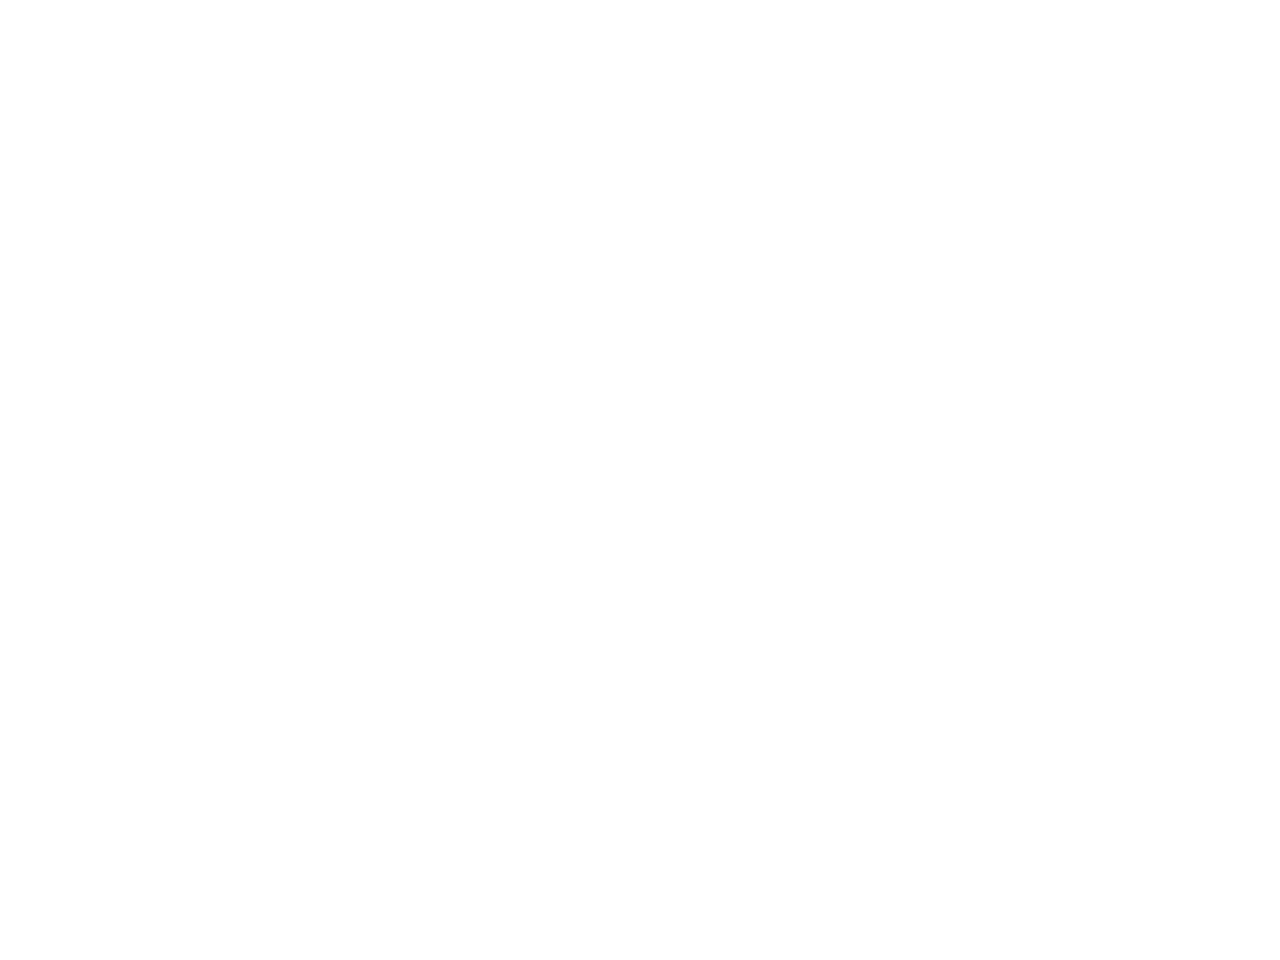

In [22]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if the animation is at the last frame, and if so, stop the animation a
    if curr == n:
        a.event_source.stop()

    # clear the plot
    plt.cla()

    # set the bins so that they are evenly spaced as we are redrawing the animation in each call. bins are set from -4 to 4 in 0.5 increments
    bins = np.arange(-4, 4, 0.5)#

    # plot the histogram using a set of x upto the curr value and custom bins
    plt.hist(x[:curr], bins=bins)

    # we also need to set the axis values, otherwise the histogram will autoscale between frames which might be annoying
    plt.axis([-4, 4, 0, 30])

    # set title and x, y labels
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')

    # annotate places text at a certain poisiton in the chart
    plt.annotate('n = {}'.format(curr), [3, 27])

fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


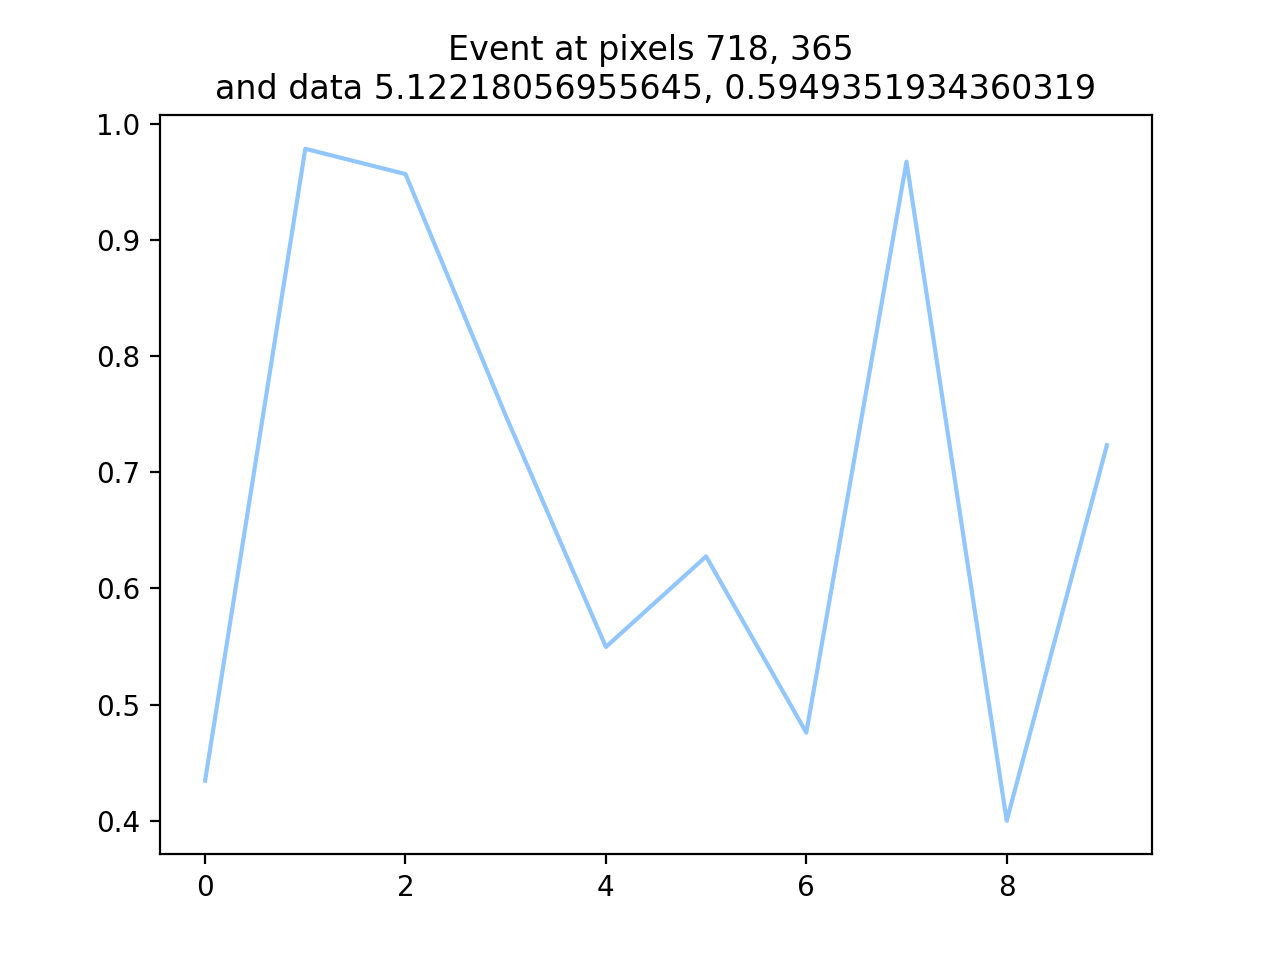

7

In [23]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

# onclick takes on parameter, the event object (which depends on the type of event). Here the event deals with mouse events, 
# They both have an x and y value regarding the location of the mouse on the canvas, and an x and y value of the mouse relatice to the data 
def onclick(event):
    # clear the plot
    plt.cla()
    # plot the data
    plt.plot(data)
    # set the title of the plot to be the variable location of the mouse
    fig

# tell mpl_connect we want to pass a button_press_event into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [24]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                    'weight': np.random.rand(10),
                    'origin': origins})
df

,height,weight,origin
0,0.042679,0.703746,Germany
1,0.954830,0.424513,Brazil
2,0.434569,0.331229,UK
3,0.821373,0.929876,USA
4,0.508066,0.230116,India
5,0.036089,0.112215,Canada
6,0.110861,0.918301,Chile
7,0.371006,0.317750,Mexico
8,0.532253,0.778531,China
9,0.533417,0.446310,Iraq


<IPython.core.display.Javascript object>


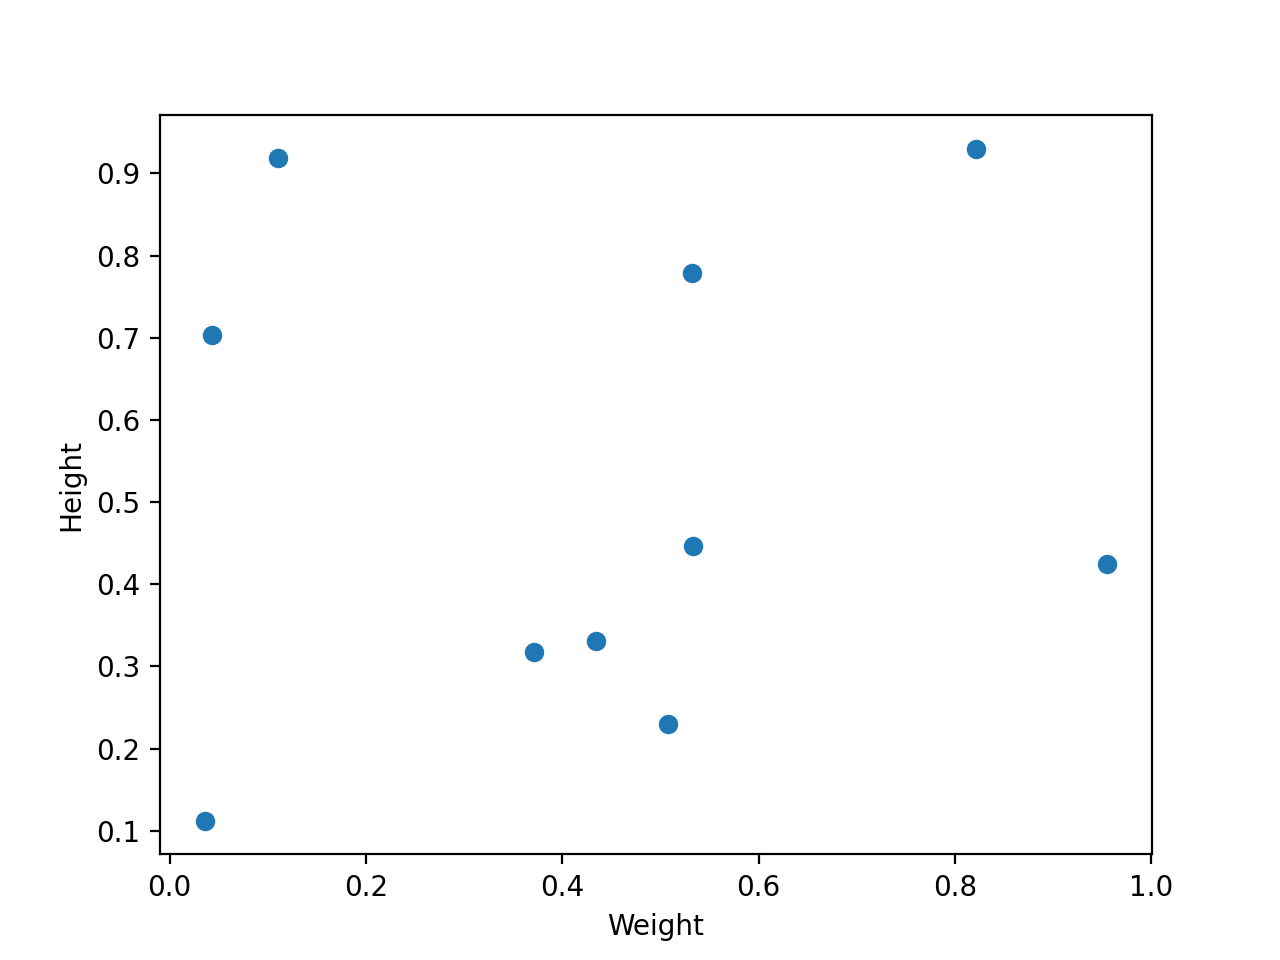

Text(0, 0.5, 'Height')

In [25]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on the event, but can be upto 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_xlabel('Weight')
plt.gca().set_ylabel('Height')

In [26]:
# in this case, the event is a pick event which has different data than the button press event. In particular, it has an index value which happens to correspond to the index in the dataframe

def onpick(event):
    # matplotlib isn't aware of the dataframe, but renders the data in the same order. So we can use th iloc indexer to pull out origin data
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7

<IPython.core.display.Javascript object>


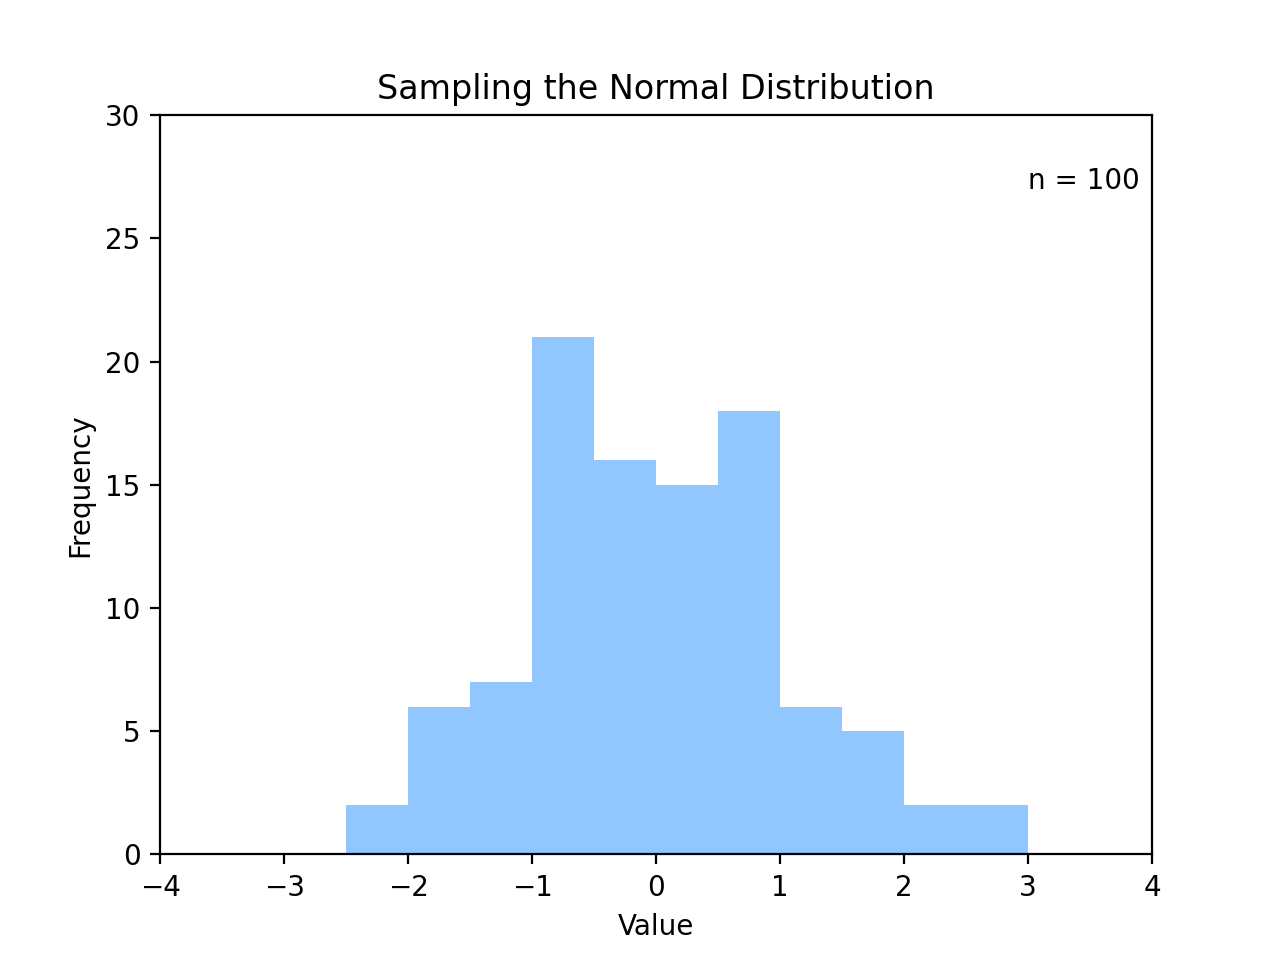

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


# anim.save('sine_wave.gif', writer='imagemagick')